# Network Security

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
data1 = pd.read_csv("MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
data2 = pd.read_csv("MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
data3 = pd.read_csv("MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
data4 = pd.read_csv("MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
data5 = pd.read_csv("MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data = [data1,data2,data3,data4,data5]
data = pd.concat (data, axis=0, sort=False, ignore_index=True)
data

del [data1,data2,data3,data4,data5]

## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854951 entries, 0 to 1854950
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [4]:
data[' Label'].value_counts()

BENIGN                        1586264
DoS Hulk                       231073
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

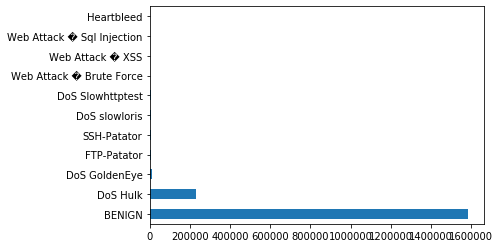

In [5]:
data[' Label'].value_counts().plot(kind='barh')

In [6]:
data = data.replace(np.inf, np.nan)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854946,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1854947,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1854948,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1854949,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
# function to calculate missing values and the percentage of missing values we have
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#find missing values in data
dt=missing_data(data)
dt[dt.Total>0]

,Total,Percent
Flow Packets/s,2144,0.115583
Flow Bytes/s,2144,0.115583


In [8]:
data= data.dropna()

## Label Encoding

In [9]:
le = LabelEncoder()

In [10]:
data[' Label']= le.fit_transform(data[' Label'])

## Data Scaling

In [11]:
X= data.drop([' Label'], axis=1)
X[X < 0] = 0
print(X)
y = data[' Label']

          Destination Port   Flow Duration   Total Fwd Packets  \
0                    54865               3                   2   
1                    55054             109                   1   
2                    55055              52                   1   
3                    46236              34                   1   
4                    54863               3                   2   
...                    ...             ...                 ...   
1854946              55641              49                   1   
1854947              45337             217                   2   
1854948                 22         1387547                  41   
1854949                 22             207                   1   
1854950              60146              50                   1   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2           

## Feature Selection

In [12]:
X_new = SelectKBest(chi2, k=30).fit_transform(X, y)
X_new.shape

(1852807, 30)

In [13]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=1234)

## XGBoost

In [14]:
# fit model no training data
model =  XGBClassifier(max_depth=15, learning_rate=1.0, n_estimators=15, seed=1234)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1234, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.94%


In [17]:
# evaluate predictions
f1 = f1_score(y_test, predictions, average='weighted')
print("F1-Score: %.2f%%" % (f1 * 100.0))

F1-Score: 93.95%


In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    523270
           1       0.69      0.77      0.73      3308
           2       0.86      0.77      0.81     75882
           3       0.72      0.67      0.69      1852
           4       0.46      0.41      0.43      1887
           5       0.90      0.68      0.78      2597
           6       0.00      0.00      0.00         5
           7       0.49      0.48      0.48      1872
           8       0.02      0.07      0.03       523
           9       0.00      0.00      0.00         9
          10       0.05      0.06      0.06       222

    accuracy                           0.94    611427
   macro avg       0.47      0.44      0.45    611427
weighted avg       0.94      0.94      0.94    611427



In [24]:
pred=pd.DataFrame({'Actual': y_test, 'Predictions':predictions})
pred

,Actual,Predictions
145369,0,0
1548512,0,0
859246,0,0
860368,0,0
749007,2,2
...,...,...
189512,0,0
305274,0,0
1437430,0,0
785845,2,2


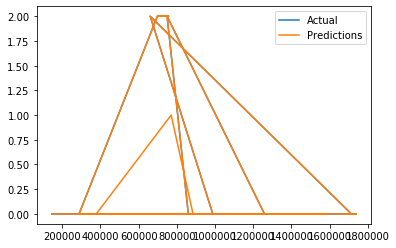

In [33]:
pred.head(20).plot()